<a href="https://colab.research.google.com/github/hug627/streamlit-for-30-days/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Credit_card_dataset.csv to Credit_card_dataset.csv


In [2]:
credit = pd.read_csv('Credit_card_dataset.csv')
display(credit)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [3]:
#  perform basic data exploration phase
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [4]:
#Corrupted and missing values handling
credit.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [5]:
#handling duplicate data
credit.duplicated().sum()

np.int64(0)

In [6]:
#outliers handling
numerical_credit= credit.select_dtypes(include=['number'])
Q1 = numerical_credit.quantile(0.25)
Q3 = numerical_credit.quantile(0.75)
IQR = Q3 - Q1
IQR
# filter out rows that are outliers
filtered_credit = credit[~((numerical_credit < (Q1 - 1.5 * IQR)) | (numerical_credit > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_credit

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
5,C10006,1.000000,1333.28,1400.057770,1800.0,0.000000
7,C10008,1.000000,436.20,679.065082,2300.0,0.000000
...,...,...,...,...,...,...
8944,C19185,0.833333,1012.73,0.000000,4000.0,0.000000
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000


In [8]:
# data encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# There are no categorical columns to encode
credit

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


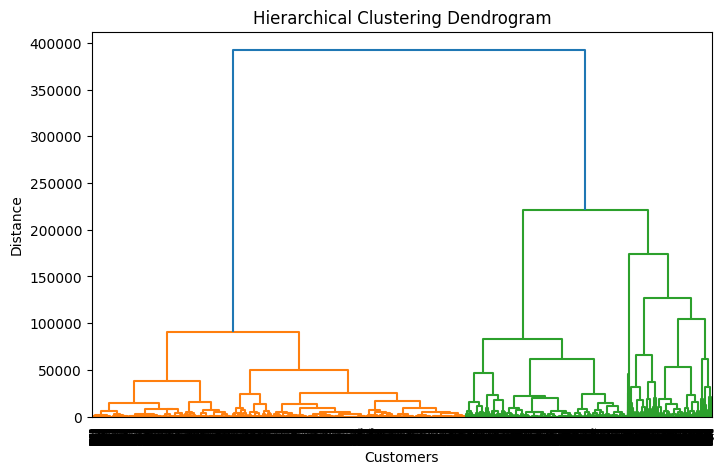

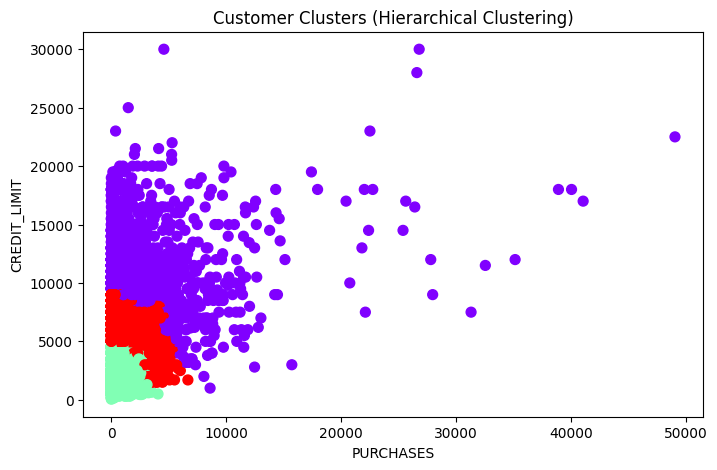

In [11]:
# Perform hierarchical clustering to identify the inherent groupings within your data.Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
# Handle missing values in the selected columns by dropping rows with NaN
X = credit[['PURCHASES', 'CREDIT_LIMIT']].dropna()
# 1. Plot dendrogram to visualize cluster distances
# -----------------------------
plt.figure(figsize=(8, 5))
Z = linkage(X, method='ward')  # Ward minimizes variance
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()
# 2. Apply Agglomerative Clustering
# -----------------------------
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')  # choose clusters based on dendrogram
y_hc = hc.fit_predict(X)
# 3. Plot the clusters
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_hc, cmap='rainbow', s=50)
plt.title("Customer Clusters (Hierarchical Clustering)")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.show()

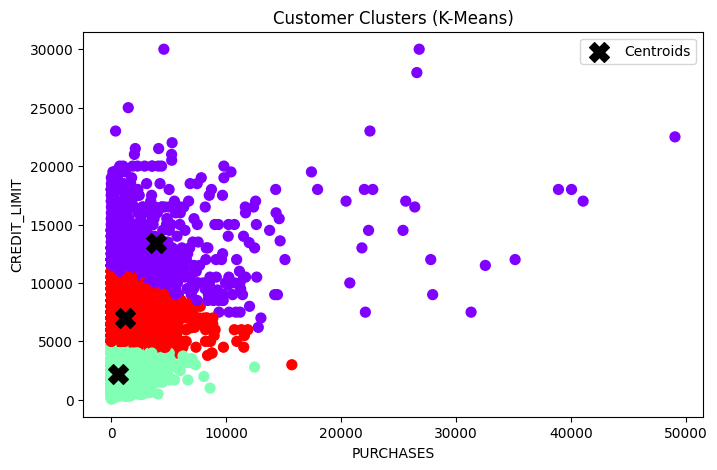

In [14]:
# Perform partitional clustering using the K-means algorithm. Then, plot the clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select only 2 features for clustering and handle missing values by dropping rows with NaN
X = credit[['PURCHASES', 'CREDIT_LIMIT']].dropna()

# 1. Apply KMeans
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)  # choose number of clusters
y_kmeans = kmeans.fit_predict(X)
# 2. Plot the clusters
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='rainbow', s=50)
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Clusters (K-Means)")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.legend()
plt.show()

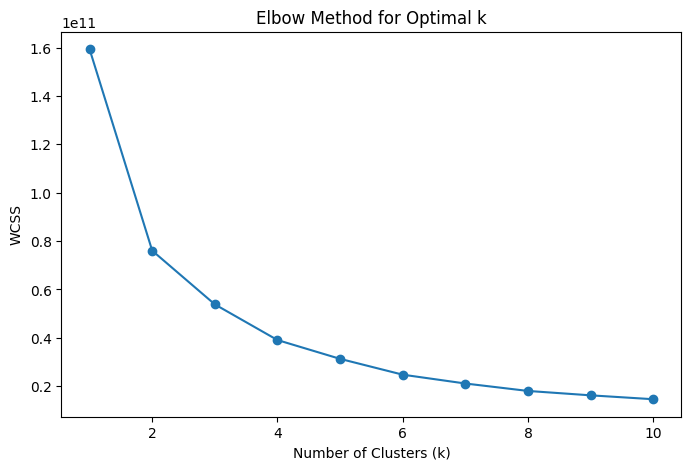

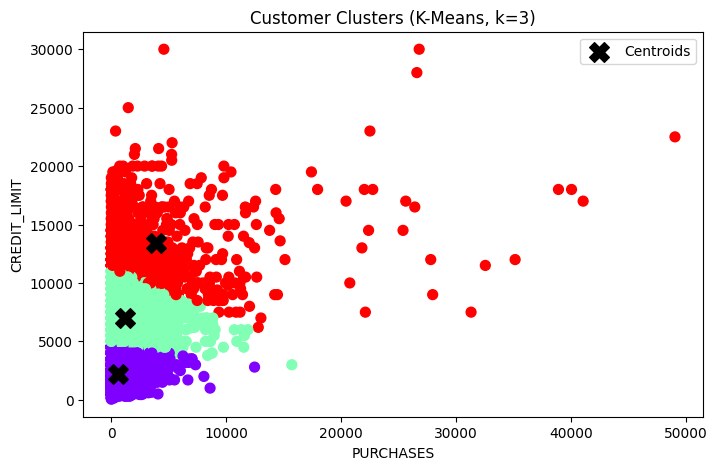

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# -----------------------------
# Select only 2 features for clustering and handle missing values by dropping rows with NaN
X = credit[['PURCHASES', 'CREDIT_LIMIT']].dropna()
# -----------------------------
# 1. Elbow Method to find best k
# -----------------------------
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):   # try k = 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Add n_init
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()
# -----------------------------
# 2. Train KMeans with best k (example: suppose elbow shows k=3)
# -----------------------------
best_k = 3  # <-- pick from the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10) # Add n_init
y_kmeans = kmeans.fit_predict(X)
# -----------------------------
# 3. Plot clusters with centroids
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, cmap='rainbow', s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.title(f"Customer Clusters (K-Means, k={best_k})")
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.legend()
plt.show()

In [ ]:
# Interpret the results
# 1.From the Elbow Method
# The elbow curve shows how WCSS (Within Cluster Sum of Squares) decreases as k increases.
#At first, adding more clusters reduces WCSS a lot, but after a certain k (the "elbow"), the improvement becomes small.
#That elbow point = best k → e.g., k=3 (often in customer segmentation).
#2. Cluster Interpretation (example k=3)
#After running KMeans with the best k, we got 3 customer groups:
#Cluster 0 (Low Purchases, Low Credit Limit)
#Customers who spend little and have small credit limits.
#Likely casual users, low-value customers.
#Cluster 1 (High Purchases, High Credit Limit)
#Customers with high spending and large credit limits.
#Possibly premium or loyal customers → very valuable segment.
#Cluster 2 (Medium Purchases, Medium Credit Limit)
#Customers in between — moderate spending and credit limits.
#Could be occasional buyers or growing customers.
#3. Business Insights
#These clusters can help in customer segmentation:
#Cluster 0 (Low spenders) → Target with promotions or incentives.
#Cluster 1 (High spenders) → Provide premium services, loyalty rewards.
#Cluster 2 (Medium group) → Upsell opportunities, encourage more purchases.